# Differential Pulse Code Modulation of First Order

This code is provided as supplementary material of the lecture Quellencodierung.

This code illustrates
* Analysis filters of first order DPCM
* Example of block adaptive DPCM

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import lfilter
import librosa
import librosa.display
import IPython.display as ipd

In [2]:
# define circular frequency
Omega = np.linspace(0,np.pi,100)

Plot the magnitude response of the analysis filter $G(z)$. We have
$$
G(\mathrm{e}^{\mathrm{j}\Omega}) = 1 - a\cdot \mathrm{e}^{-\mathrm{j}\Omega}
$$
with the magnitude
$$
|G(\mathrm{e}^{\mathrm{j}\Omega})| = \sqrt{1 + a^2 - 2a\cos(\Omega)}
$$
For the special case $a=1$, we have
$$
|G(\mathrm{e}^{\mathrm{j}\Omega})| = \sqrt{2\cdot (1 - \cos(\Omega))} = 2\cdot\left\vert\sin\left(\frac{\Omega}{2}\right)\right\vert
$$

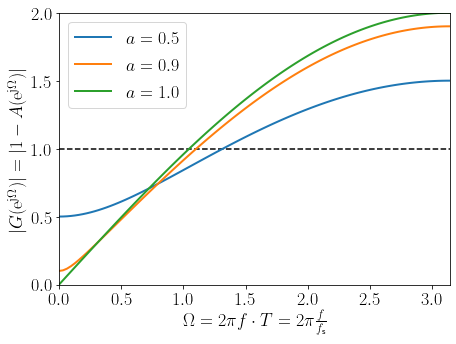

In [4]:
font = {'size'   : 18}
plt.rc('font', **font)
plt.rc('text', usetex=True)

plt.figure(figsize=(7, 5))
plt.plot(Omega, np.abs(1- 0.5*np.exp(-1j*Omega)),linewidth=2)
plt.plot(Omega, np.abs(1- 0.9*np.exp(-1j*Omega)),linewidth=2)
plt.plot(Omega, np.abs(1- 1.0*np.exp(-1j*Omega)),linewidth=2)
plt.hlines(1,0,np.pi,color='k', linestyles='dashed')
plt.xlim((0,np.pi))
plt.ylim((0,2))
plt.xlabel(r'$\Omega = 2\pi f\cdot T = 2\pi\frac{f}{f_{\mathsf{s}}}$')
plt.ylabel(r'$|G(\mathrm{e}^{\mathrm{j}\Omega})| = |1-A(\mathrm{e}^{\mathrm{j}\Omega})|$')
plt.legend(['$a=0.5$','$a=0.9$','$a = 1.0$'])
plt.savefig('figure_DST_8.4c.pdf',bbox_inches='tight')

Generate an artificial signal and apply first order linear prediction to the signal. Recall that
$$
a_{\text{opt}} = \frac{\varphi_{xx}(1)}{\varphi_{xx}(0)}
$$
The residual signal is given by
$$
d[k] = x[k] - a_{\text{opt}}\cdot x[k-1]
$$

In [ ]:
# generate arbitrary signal of 160 samples
n = 160
x = (np.sin(np.arange(n)/n*2*np.pi * 7) + np.random.randn(n)*0.08) * np.sin(np.arange(n)/n*np.pi) 

a_opt = np.correlate(x[:-1],x[1:])[0] / np.correlate(x,x)[0]

# carry out filtering, xh = x[1:] - a * x[:-1]   use filtering function
d = lfilter(np.array([1, -a_opt]), 1, x)

In [ ]:
font = {'size'   : 18}
plt.rc('font', **font)
plt.rc('text', usetex=True)

plt.figure(figsize=(8, 8))
plt.subplot(2,1,1)
plt.hlines([-0.5,0.5],0,n-1,color='k', linestyles='dashed', linewidth=1)
plt.xlim((0,n-1))
plt.ylim((-1.2,1.2))
plt.step(np.arange(n),x, linewidth=2)
plt.ylabel('$x[k]$')

plt.subplot(2,1,2)
plt.hlines([-0.5,0.5],0,n-1,color='k', linestyles='dashed', linewidth=1)
plt.xlim((0,n-1))
plt.ylim((-1.2,1.2))
plt.step(np.arange(n),d, linewidth=2)
plt.xlabel('$k$')
plt.ylabel(r'$x[k]-a_{\textrm{opt}}x[k-1]$')
plt.tight_layout()

plt.savefig('figure_DST_8.5.pdf', bbox_inches='tight')